# 1. Recreate graphs

a) Here we use subplots to get two axes in one figure

b) This one will require some data processing to be able to come to this point.
  Hint: df.explode() and df.join()

c) A df has a hist() method for creating histogram

### a) Here we use subplots to get two axes in one figure


In [83]:
import matplotlib.pyplot as plt
import pandas as pd
import duckdb as db

df = pd.read_csv("data/Steam Top 100 Played Games - List.csv")
df.head()

,Rank,Name,Thumbnail URL,Store Link,Price,Current Players,Peak Today,Genre Tags
0,1,Counter-Strike 2,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/730/Counter...,Free To Play,"1,485,535","1,489,929","FPS, Shooter, Multiplayer, Competitive, Action..."
1,2,PUBG: BATTLEGROUNDS,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/578080/PUBG...,Free To Play,"765,150","765,150","Survival, Shooter, Battle Royale, Multiplayer,..."
2,3,Dota 2,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/570/Dota_2?...,Free To Play,"698,757","715,295","Free to Play, MOBA, Multiplayer, Strategy, eSp..."
3,4,Marvel Rivals,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/2767030/Mar...,Free To Play,"312,427","565,653","Free to Play, Multiplayer, Hero Shooter, Third..."
4,5,Path of Exile 2,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/2694490/Pat...,£23.93,"258,475","288,757","Action RPG, Hack and Slash, RPG, Action, Souls..."


In [84]:

df_game_players = db.query("""--sql
                   SELECT Name, "Current Players", Price
                   from df
                   ORDER BY "Current Players" 
    """).df()

df_game_players

,Name,Current Players,Price
0,Counter-Strike 2,"1,485,535",Free To Play
1,Delta Force,"111,888",Free To Play
2,Stardew Valley,"117,949",£10.99
3,Wallpaper Engine,"142,322",£4.29
4,Apex Legends™,"150,754",Free To Play
...,...,...,...
95,ELDEN RING,"73,754",£49.99
96,Football Manager 2024,"75,905",£17.99
97,PUBG: BATTLEGROUNDS,"765,150",Free To Play
98,Baldur's Gate 3,"84,290",£49.99


In [85]:
df_game_players["Current Players"] = df_game_players["Current Players"].str.replace(",", "").astype(int)

In [86]:
df_game_players["Price"] = df_game_players["Price"].str.replace("£", "")
df_game_players["Price"] = df_game_players["Price"].str.replace("Free To Play", "0").astype(float)

In [87]:

df_game_players = db.query("""--sql
                   SELECT Name, "Current Players", Price
                   from df_game_players
                   ORDER BY "Current Players" DESC
    """).df()

df_game_players

,Name,Current Players,Price
0,Counter-Strike 2,1485535,0.00
1,PUBG: BATTLEGROUNDS,765150,0.00
2,Dota 2,698757,0.00
3,Marvel Rivals,312427,0.00
4,Path of Exile 2,258475,23.93
...,...,...,...
95,Sid Meier's Civilization® V,17916,19.99
96,Counter-Strike,17900,7.19
97,Cities: Skylines,17866,24.99
98,Fallout 4,17009,15.99


In [88]:
df_game_top10 = df_game_players.iloc[:10]

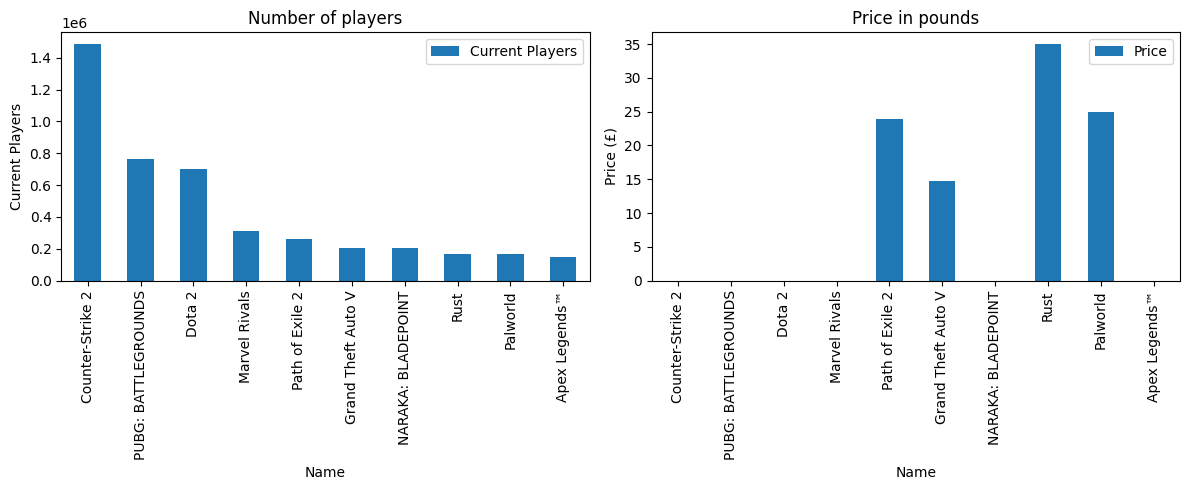

In [89]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Rita spelarnas antal på första axeln
df_game_top10.plot(kind="bar", x="Name", y="Current Players", ax=ax1, legend=True)
ax1.set_title("Number of players")
ax1.set_ylabel("Current Players")

# Rita pris på andra axeln
df_game_top10.plot(kind="bar", x="Name", y="Price", ax=ax2, legend=True)
ax2.set_title("Price in pounds")
ax2.set_ylabel("Price (£)")

# Layoutfix
plt.tight_layout()
plt.show()

In [90]:
df_game_price_top10 = df_game_top10.drop(["Current Players"], axis=1).set_index("Name")
df_game_players_top10 = df_game_top10.drop(["Price"], axis=1).set_index("Name")

In [91]:
def top10_players_plot(ax):
    df_game_players_top10.plot(kind="bar", ax=ax, title="Number of players for most popular game on Steam", xlabel="Game", ylabel="Numbers of players")
    arrowprops = dict(arrowstyle = "->", linewidth = 1, connectionstyle = "arc3, rad=0.2")
    arrowprops_1 = dict(arrowstyle = "->", linewidth = 1, connectionstyle = "arc3, rad=-0.1")
    ax.annotate(text = "Most popular game is free", xy=(2, 800000), arrowprops=arrowprops,  xytext=(1, 1000000))
    ax.annotate(text="", xy=(1, 800000), arrowprops=arrowprops,  xytext=(1.7, 990000))
    ax.annotate(text="", xy=(0.3,1100000), arrowprops=arrowprops,  xytext=(1, 1020000))
    ax.annotate(text="", xy=(3,350000), arrowprops=arrowprops_1,  xytext=(3.2, 990000))


In [120]:
def top10_price_plot(ax):
    df_game_price_top10.plot(kind="bar", ax=ax, title="Price in pounds for the most popular games on Steam", xlabel="Game", ylabel="Price in Pound (£)")
    ax.annotate(text="No Bars --> Free to play", xy=(1, 1), xytext=(0, 2))

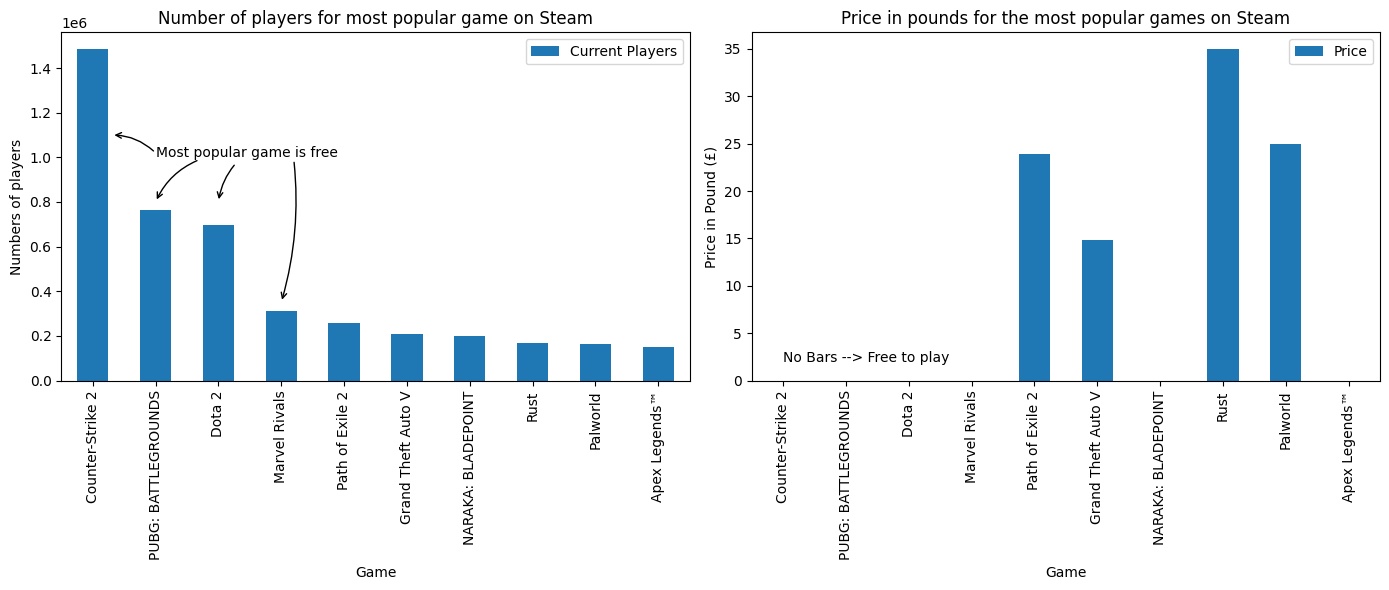

In [121]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

top10_players_plot(ax1)
top10_price_plot(ax2)

plt.tight_layout()
plt.show()
fig.savefig("../figures/subplot_ex0.1.png", dpi=400)

### b) This one will require some data processing to be able to come to this point.
  Hint: df.explode() and df.join()

In [94]:
df.head()

,Rank,Name,Thumbnail URL,Store Link,Price,Current Players,Peak Today,Genre Tags
0,1,Counter-Strike 2,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/730/Counter...,Free To Play,"1,485,535","1,489,929","FPS, Shooter, Multiplayer, Competitive, Action..."
1,2,PUBG: BATTLEGROUNDS,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/578080/PUBG...,Free To Play,"765,150","765,150","Survival, Shooter, Battle Royale, Multiplayer,..."
2,3,Dota 2,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/570/Dota_2?...,Free To Play,"698,757","715,295","Free to Play, MOBA, Multiplayer, Strategy, eSp..."
3,4,Marvel Rivals,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/2767030/Mar...,Free To Play,"312,427","565,653","Free to Play, Multiplayer, Hero Shooter, Third..."
4,5,Path of Exile 2,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/2694490/Pat...,£23.93,"258,475","288,757","Action RPG, Hack and Slash, RPG, Action, Souls..."


In [95]:
df["Genre Tags"]

0     FPS, Shooter, Multiplayer, Competitive, Action...
1     Survival, Shooter, Battle Royale, Multiplayer,...
2     Free to Play, MOBA, Multiplayer, Strategy, eSp...
3     Free to Play, Multiplayer, Hero Shooter, Third...
4     Action RPG, Hack and Slash, RPG, Action, Souls...
                            ...                        
95    Turn-Based Strategy, Strategy, Turn-Based, Mul...
96    Action, FPS, Multiplayer, Shooter, Classic, Te...
97    City Builder, Simulation, Building, Management...
98      Open World, Post-apocalyptic, Singleplayer, RPG
99    Free to Play, Survival, Zombies, Multiplayer, ...
Name: Genre Tags, Length: 100, dtype: object

In [96]:

genre_series = df['Genre Tags'].dropna()

all_tags = genre_series.str.split(', ').explode()

cleaned_tags = all_tags[~all_tags.isin(['', '+'])]

top_tags = cleaned_tags.value_counts().head(5)

print(top_tags)


Genre Tags
Multiplayer     71
Action          64
Singleplayer    55
Open World      45
Co-op           42
Name: count, dtype: int64


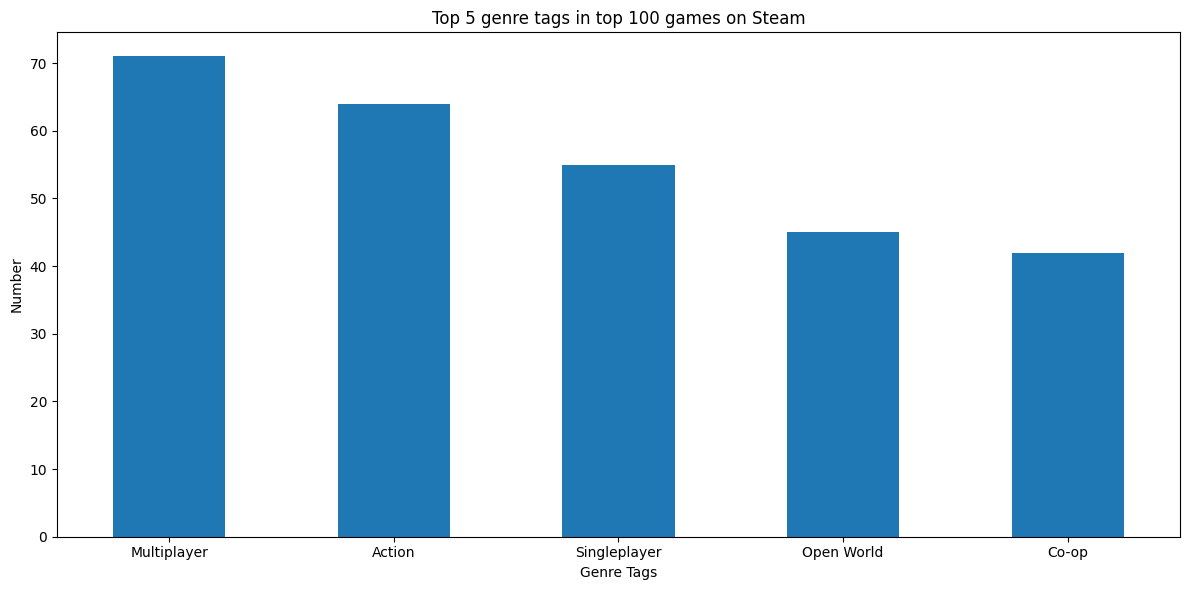

In [97]:
top_tags.plot(kind='bar', figsize=(12,6))

plt.title('Top 5 genre tags in top 100 games on Steam')
plt.xlabel('Genre Tags')
plt.ylabel('Number')
plt.xticks(rotation=0)
plt.tight_layout()

In [125]:
df_game_genre = df[["Name"]].join(df["Genre Tags"].str.split(",").replace("+", "").explode())
df_game_genre

,Name,Genre Tags
0,Counter-Strike 2,FPS
0,Counter-Strike 2,Shooter
0,Counter-Strike 2,Multiplayer
0,Counter-Strike 2,Competitive
0,Counter-Strike 2,Action
...,...,...
99,Unturned,Massively Multiplayer
99,Unturned,Indie
99,Unturned,Atmospheric
99,Unturned,Casual


In [137]:
df_number_tags = db.query(
    """--sql
    SELECT "Genre Tags", COUNT(*) AS Number
    FROM df_game_genre
    GROUP BY "Genre Tags"
    ORDER BY Number DESC
""").df()

df_number_tags

,Genre Tags,Number
0,+,82
1,Multiplayer,69
2,Action,62
3,Singleplayer,55
4,Co-op,39
...,...,...
296,Investigation,1
297,Thriller,1
298,Surival,1
299,Utilities,1


<Axes: title={'center': 'Top 5 genre tags in top 100 games in steam'}, xlabel='Genre Tags'>

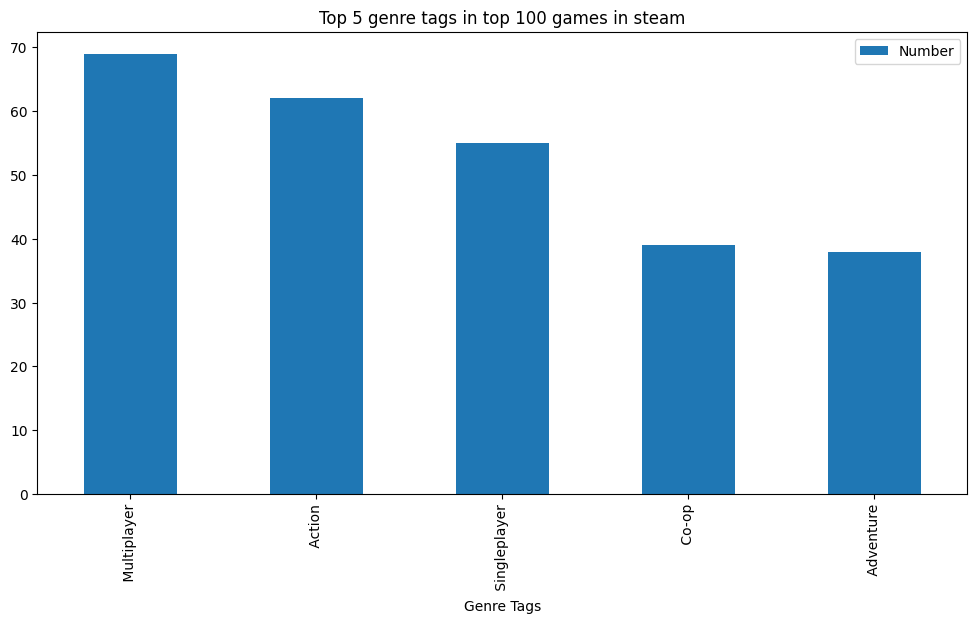

In [141]:
df_number_tags.iloc[1:6].plot(kind='bar',title="Top 5 genre tags in top 100 games in steam" ,x="Genre Tags", y="Number", figsize=(12,6))

### c) A df has a hist() method for creating histogram

In [ ]:
df["num_tags"] = df["Genre Tags"].apply(lambda x: len(x.split(", ")))

df["num_tags"]

0     21
1     21
2     21
3     21
4     21
      ..
95    21
96    21
97    21
98     4
99    21
Name: num_tags, Length: 100, dtype: int64

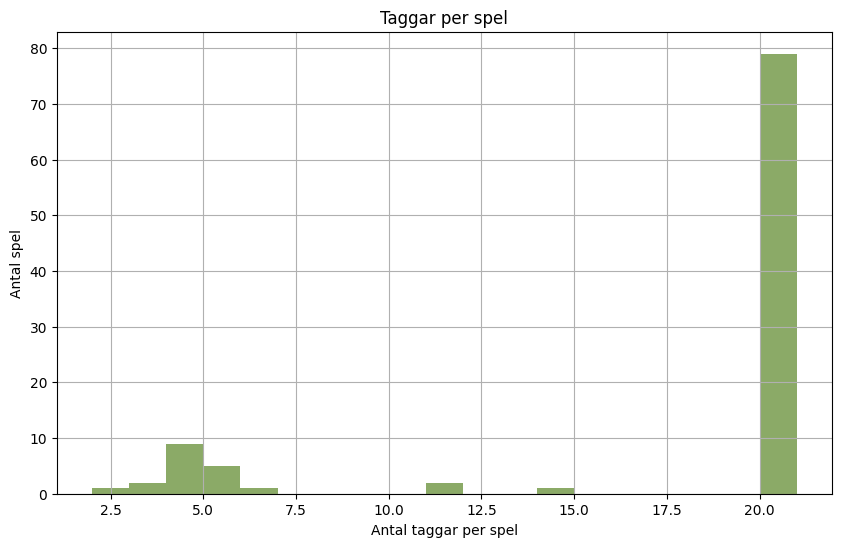

In [146]:
plt.figure(figsize=(10,6))
plt.hist(df["num_tags"], bins=range(df["num_tags"].min(), df["num_tags"].max() + 1),  color='#8BAA67')
plt.xlabel("Antal taggar per spel")
plt.ylabel("Antal spel")
plt.title("Taggar per spel")
plt.grid(True)
plt.show()